### VIDEO GAMES SALES ANALYSIS

What are the most successful games?

You work for Ice, an online store that sells video games worldwide. User and expert reviews, genres, platforms (e.g., Xbox or PlayStation), and historical sales data are available from open sources. You need to identify patterns that determine whether a game is successful or not. This will allow you to spot promising projects and plan advertising campaigns.

You have data in front of you that goes back to 2016. Imagine it's December 2016 and you're planning a campaign for 2017.

The important thing is to gain experience working with data. It doesn't really matter if you're forecasting 2017 sales based on 2016 data or 2027 sales based on 2026 data.

The dataset contains a "rating" column that stores the ESRB rating for each game. The Entertainment Software Rating Board evaluates a game's content and assigns an age rating such as Teen or Adult.


Cuales son los juegos mas exitosos?

Trabajas para la tienda online Ice que vende videojuegos por todo el mundo. Las reseñas de usuarios y expertos, los géneros, las plataformas (por ejemplo, Xbox o PlayStation) y los datos históricos sobre las ventas de juegos están disponibles en fuentes abiertas. Tienes que identificar patrones que determinen si un juego tiene éxito o no. Esto te permitirá detectar proyectos prometedores y planificar campañas publicitarias.

Delante de ti hay datos que se remontan a 2016. Imaginemos que es diciembre de 2016 y estás planeando una campaña para 2017.

Lo importante es adquirir experiencia de trabajo con datos. Realmente no importa si estás pronosticando las ventas de 2017 en función de los datos de 2016 o las ventas de 2027 en función de los datos de 2026.

El dataset contiene una columna "rating" que almacena la clasificación ESRB de cada juego. El Entertainment Software Rating Board (la Junta de clasificación de software de entretenimiento) evalúa el contenido de un juego y asigna una clasificación de edad como Adolescente o Adulto.



1. Open files, review table's general information

In [167]:
# import libraries
import pandas as pd
import numpy as np
import math as mt
import seaborn as sns
from scipy import stats as st
from matplotlib import pyplot as plt

In [168]:
# Open csv file
games_df = pd.read_csv('games.csv')

print('Vista general del dataset\n')
display(games_df.head())
print('\nInformacion general del dataset\n')
print(games_df.info())

Vista general del dataset



,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN



Informacion general del dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None


2. Data handling (modify ,clean, prepare)

2.1 Replace the column names (make them lowercase).
2.2 Convert the data to the required types.

In [169]:
# Modify column names to lowercase
games_df.columns = games_df.columns.str.lower()
print(games_df.columns)

# Change to correct datatype
games_df['year_of_release'] = games_df['year_of_release'].astype('Int64')
games_df['user_score'] = games_df['user_score'].replace('tbd', np.nan)
games_df['user_score'] = games_df['user_score'].astype('float64')
games_df['critic_score'] = games_df['critic_score'].astype('Int64')

print(games_df.info())


Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   Int64  
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(2), float64(5), object(4)
memory usage: 1.4+ MB
None


2.3 Describe the columns in which the data types have been changed and explain why

Column 'year_of_release' was modified for datatype int64 since only contains the year of release, no need to be float or to_datetime, column 'user_score' was modified to float64 since there are some users that provides float data and I wanted to keep them all scores count, also I handled the 'tbd' data by replacing to nan until I decide what to do with the missing values, and also modified 'critic_score' column because the score critics used only integer values not float values, so to handle properly in the future the datatype was changed to int64.

2.4 if necessary choose how to treat missing values: Explain why you filled in missing values as you did or why you decided to leave then blank

Critic median:  71.0
Critic mean:  68.96767850559173

Critic score left-skewed distribution



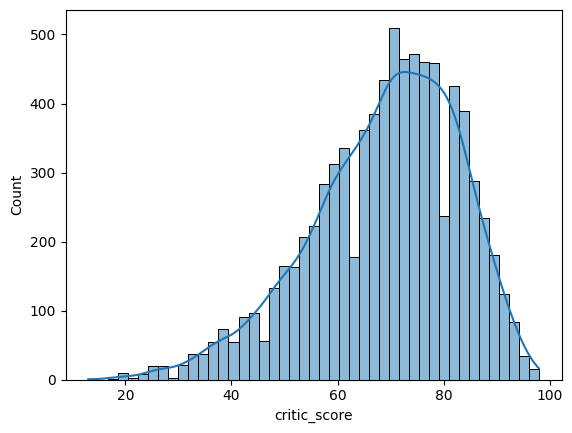

User median: 7.5
User mean: 7.125046113306982

User score left-skewed distribution



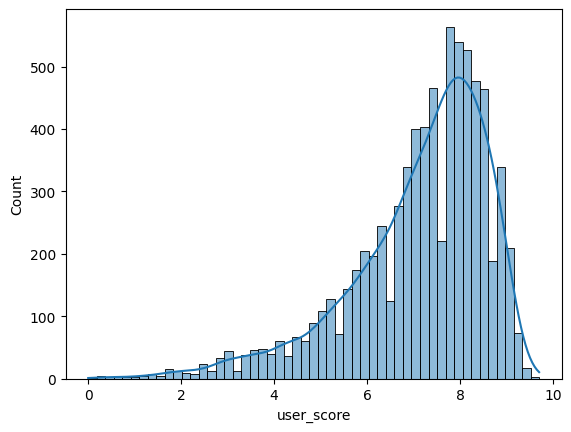

In [170]:
# Handle NaN, Null values
# Fill NaN values for median values
critic_median = games_df['critic_score'].median()
critic_mean = games_df['critic_score'].mean()

print('Critic median: ', critic_median)
print('Critic mean: ', critic_mean)

print('\nCritic score left-skewed distribution\n')
sns.histplot(games_df['critic_score'], kde=True)
plt.show()

games_df['critic_score'] = games_df['critic_score'].fillna(critic_median)

# Fill Null values for median values
user_median = games_df['user_score'].median()
user_mean = games_df['user_score'].mean()

print(f'User median: {user_median}')
print('User mean:', user_mean)

print('\nUser score left-skewed distribution\n')
sns.histplot(games_df['user_score'], kde=True)
plt.show()
games_df['user_score'] = games_df['user_score'].fillna(user_median)

# Fill Null values for 'Unknown'
games_df['rating'] = games_df['rating'].fillna('Unknown')


I decided to fill the NaN, Null values for the median on the critic_score and user_score columns due to the distribution is skewed to the left in both cases, so this means that the median is more accurate value to represent the total scores (I decided to fill the NaN and TBD values for the median on user_score), for the rating columns I just replace the Null values for the "unknown" value due to the rate is non numercal, unable to determine categorical rates, and for columns name and genre I just leave as they are since are a few rows with Null values, not a significant impact to the statistics.

Explain possible reasons why values are missing: Since the columns that contains higher missing values are the Score and rate values, may be these are missing due to no one set a valuation socre for them or they were not popular enough to have a review or rate. 

2.5 Calculate the total sales (the sum of the sales across all regions) for each game and place these values in a saparate column

In [171]:
# Calculate total sales by region for games
games_df['total_sales'] = (
    games_df['na_sales'] +
    games_df['eu_sales'] +
    games_df['jp_sales'] +
    games_df['other_sales']
    )

display(games_df.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,71,7.5,Unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,71,7.5,Unknown,31.38


3. Data Analysis

3.1 Look at how many games were relesed in different years. Is the data for each period significant?

In [172]:
# Games relesed per year
games_per_year = games_df.groupby('year_of_release')['name'].count().reset_index()
games_per_year.columns = ['year_of_release', 'num_games']
print('Games relesed per year\n')
print(games_per_year)



Games relesed per year

    year_of_release  num_games
0              1980          9
1              1981         46
2              1982         36
3              1983         17
4              1984         14
5              1985         14
6              1986         21
7              1987         16
8              1988         15
9              1989         17
10             1990         16
11             1991         41
12             1992         43
13             1993         60
14             1994        121
15             1995        219
16             1996        263
17             1997        289
18             1998        379
19             1999        338
20             2000        350
21             2001        482
22             2002        829
23             2003        775
24             2004        762
25             2005        939
26             2006       1006
27             2007       1197
28             2008       1427
29             2009       1426
30             

The data for each period is significant as we can see that sales grew in the first few years unitl they peaked in 2011. Later we can see that sales decline shaprly unitl 2016.

3.2 Observe how sales vary from one platform to another

Most polular Platforms by Sales

platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
Name: total_sales, dtype: float64

Top 5 Sales platforms group by year



,year_of_release,platform,total_sales
6,2004,PS2,211.81
28,2009,Wii,206.97
3,2002,PS2,205.38
4,2003,PS2,184.31
23,2008,Wii,171.32


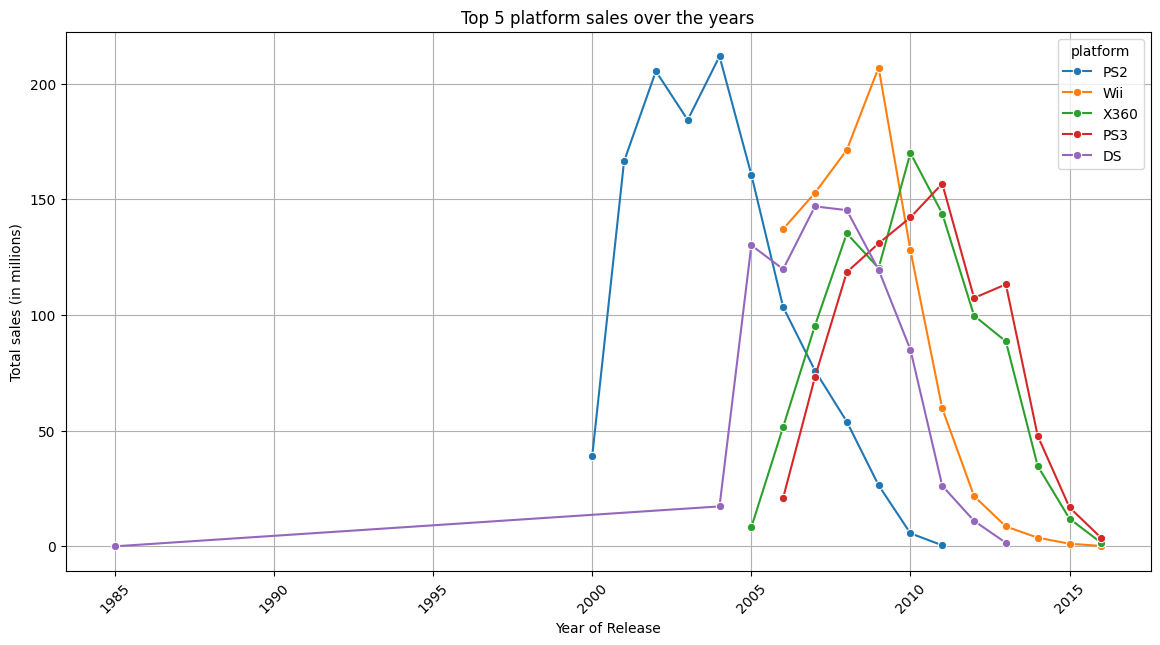

In [173]:
# Sales by platform
platform_sales = (
    games_df.groupby('platform')['total_sales']
    .sum().sort_values(ascending=False)
)

print('Most polular Platforms by Sales\n')
print(platform_sales.head(5))

top_platforms = platform_sales.head(5).index

# Filter best selling platforms
filtered_df = games_df[games_df['platform'].isin(top_platforms)]

# Group by year, platform and add-up sales
sales_by_year_platform = (
    filtered_df.groupby(['year_of_release', 'platform'])['total_sales']
    .sum().reset_index().sort_values(by='total_sales', ascending=False)
)

print('\nTop 5 Sales platforms group by year\n')
display(sales_by_year_platform.head(5))

#Graphic

plt.figure(figsize=(14,7))
sns.lineplot(
    data=sales_by_year_platform,
    x='year_of_release',
    y='total_sales',
    hue='platform',
    marker='o'
)

plt.title('Top 5 platform sales over the years')
plt.xlabel('Year of Release')
plt.ylabel('Total sales (in millions)')
plt.xticks(rotation=45)
plt.grid(True)

plt.show()

3.3 Choose the platforms with the highest total sales and build a sidtribution bases on each year's data

The best sell platforms are PS2, WII, x360, PS3 and DS

3.4 Determine the period for which you shuold collect data. To do this, look at your answers to the previous questions. the data should allow you to build a model for 2017

In [174]:
# Platform activity
platform_lifecycle = (
    games_df.groupby('platform')['year_of_release']
    .agg(['min', 'max']).reset_index()
    .rename(columns={'min': 'first_year', 'max':'last_year'})
)

# Calculate duration activity in years
platform_lifecycle['uptime'] = platform_lifecycle['last_year'] - platform_lifecycle['first_year'] + 1

print('Platform duration activity\n')
print(platform_lifecycle.sort_values(by='uptime', ascending=False))

# Platforms first year showup
new_platforms_timeline = platform_lifecycle.sort_values(by='first_year')

# diference between platforms
new_platforms_timeline['years_since_previous'] = new_platforms_timeline['first_year'].diff()

print('\nTime to take new platforms to apper and old ones disappear\n')
print(new_platforms_timeline[['platform', 'first_year', 'years_since_previous']].head(10))
print('\nAverge time for new platforms to apear is: ', new_platforms_timeline['years_since_previous'].mean())


Platform duration activity

   platform  first_year  last_year  uptime
13       PC        1985       2016      32
4        DS        1985       2013      29
5        GB        1988       2001      14
28     X360        2005       2016      12
19      PSP        2004       2015      12
16      PS2        2000       2011      12
11      NES        1983       1994      12
3        DC        1998       2008      11
26      Wii        2006       2016      11
17      PS3        2006       2016      11
0      2600        1980       1989      10
23     SNES        1990       1999      10
15       PS        1994       2003      10
29       XB        2000       2008       9
6       GBA        2000       2007       8
7        GC        2001       2007       7
10      N64        1996       2002       7
2       3DS        2011       2016       6
20      PSV        2011       2016       6
21      SAT        1994       1999       6
27     WiiU        2012       2016       5
8       GEN        1990   

3.5 Look for platforms that used to be popular vut are now losing sales. How long does it typically take for new platforms to appear and old one to disapper?

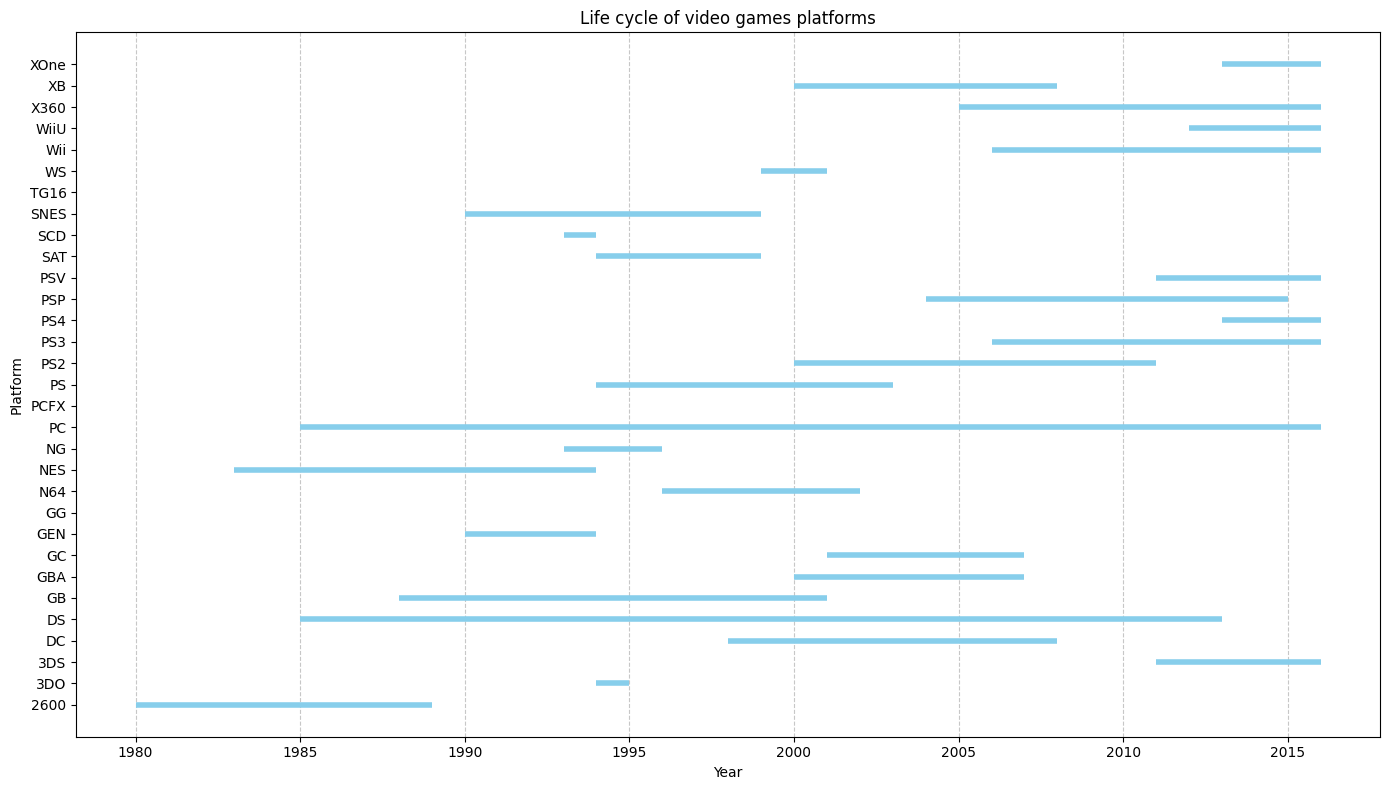


Top 5 longest video games platforms lifecycle

   platform  first_year  last_year  uptime
13       PC        1985       2016      32
4        DS        1985       2013      29
5        GB        1988       2001      14
28     X360        2005       2016      12
19      PSP        2004       2015      12


In [175]:
plt.figure(figsize=(14,8))

for i, row in platform_lifecycle.iterrows():
    plt.hlines(
        y=row['platform'],
        xmin=row['first_year'],
        xmax=row['last_year'],
        color='skyblue',
        linewidth=4
    )

plt.title("Life cycle of video games platforms")
plt.xlabel('Year')
plt.ylabel('Platform')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Top 5 longest video games platforms lifecycle
longest=platform_lifecycle.sort_values(by='uptime', ascending=False).head(5)

print('\nTop 5 longest video games platforms lifecycle\n')
print(longest[['platform', 'first_year', 'last_year', 'uptime']])

3.6 Which platforms are leading in sales? Which ones are growing and which ones are declining? Choose several potentially profitable platforms.

We can see that the best sell platforms are PS2, X360, PS3, Wii and DS which were the most polular platforms, while sales for year are  PS2, WII, x360, PS3 and the longest uptime in the market are PC, DS, GB, x360, and PSP.

The platforms that reduce their activities are 3DO, SCD, TG16, PCFX and GG, on the other side the most profitable platforms are PS2, X360, PS3, Wii and DS

In [176]:
# Most polular Platforms by Sales with no current activity
total_sales_by_platform = (
    games_df.groupby('platform')['total_sales']
    .sum().sort_values(ascending=False).reset_index()
)
last_release = (
    games_df.groupby('platform')['year_of_release']
    .max().reset_index()
    .rename(columns={'year_of_release': 'last_year'})
)

# merge sales and last activty year 
platform_status = total_sales_by_platform.merge(last_release, on='platform')

platform_status['is_discontinued'] = platform_status['last_year'] < 2017

discontinued_popular = platform_status[
    (platform_status['is_discontinued']) &
    (platform_status['total_sales'] > platform_status['total_sales'].median())
].sort_values(by='total_sales', ascending=False)


print('Most polular Platforms by Sales with no current activity\n')
display(discontinued_popular.head(5))


Most polular Platforms by Sales with no current activity



,platform,total_sales,last_year,is_discontinued
0,PS2,1255.77,2011,True
1,X360,971.42,2016,True
2,PS3,939.65,2016,True
3,Wii,907.51,2016,True
4,DS,806.12,2013,True


3.7 Create a box plot for the global sales of all games broken down by platform. Are the differences in sales significant? What about the average sales across various platforms? Discribe findings.

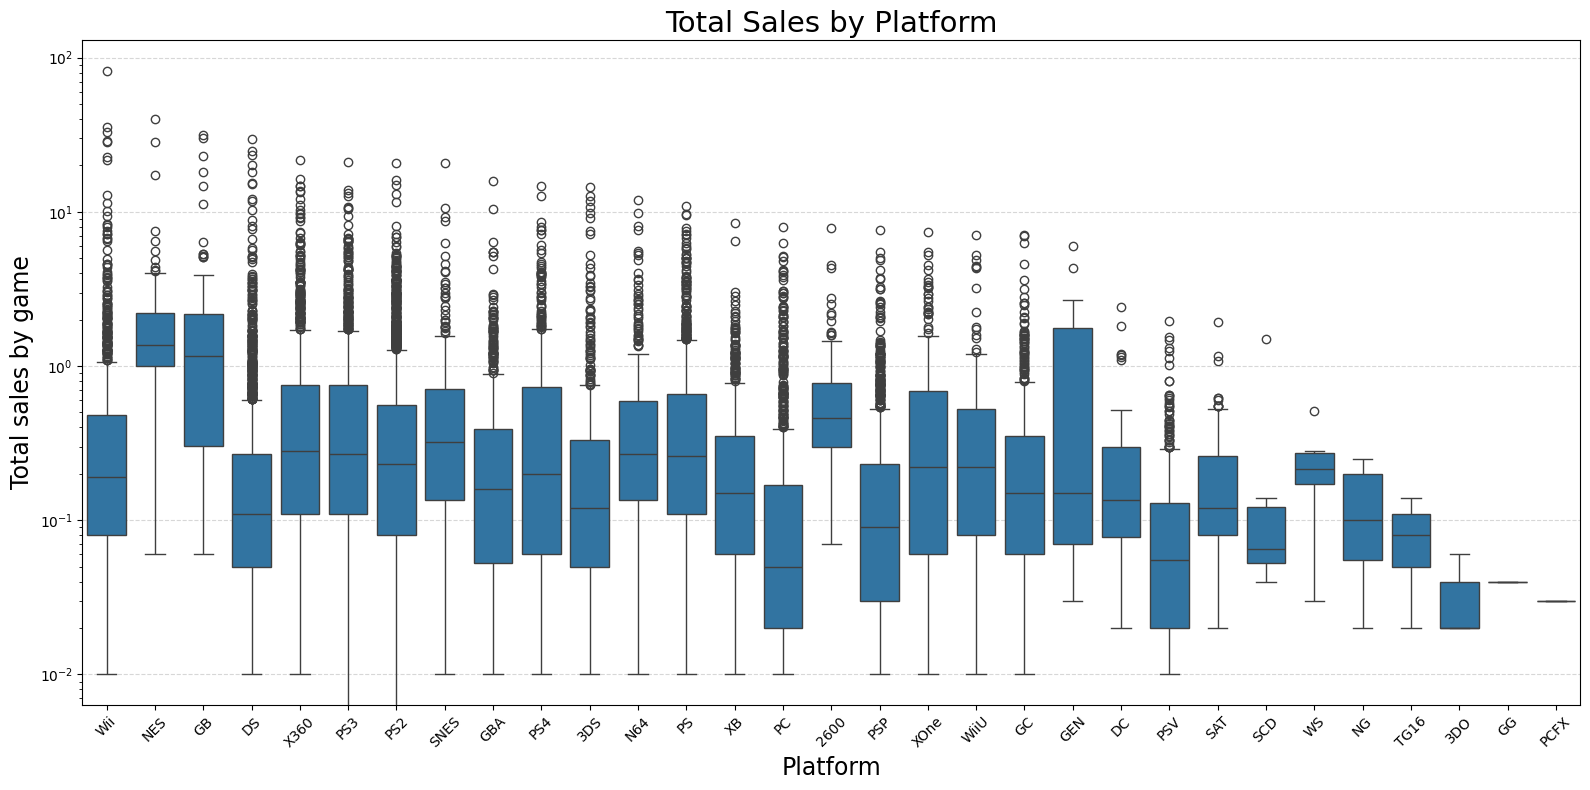

In [177]:
# Global sales of all games by platform
plt.figure(figsize=(16,8))

sns.boxplot(
    data=games_df,
    x='platform',
    y='total_sales',
)

plt.yscale('log')
plt.title('Total Sales by Platform', fontsize=21)
plt.xlabel('Platform', fontsize=17)
plt.ylabel('Total sales by game', fontsize=17)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Are the differences in sales significants?
Yes, some platforms have very good sales and others have very sales

What about average sales across platforms?
Most of the total sales across platfomrs are between the 100k copies and 500k copies, however multiple platforms as WII, DS, XBOX, PS3 and PS2 have extraordinary single games sale success, as an example WII that have 1 game with approx 100 million copies sold. 

3.8 See how user and professional reviews affect sales for a popular platform (your choice). 

Create a scatter plot and calculate the correlation between reviews and sales. Draw conclusions

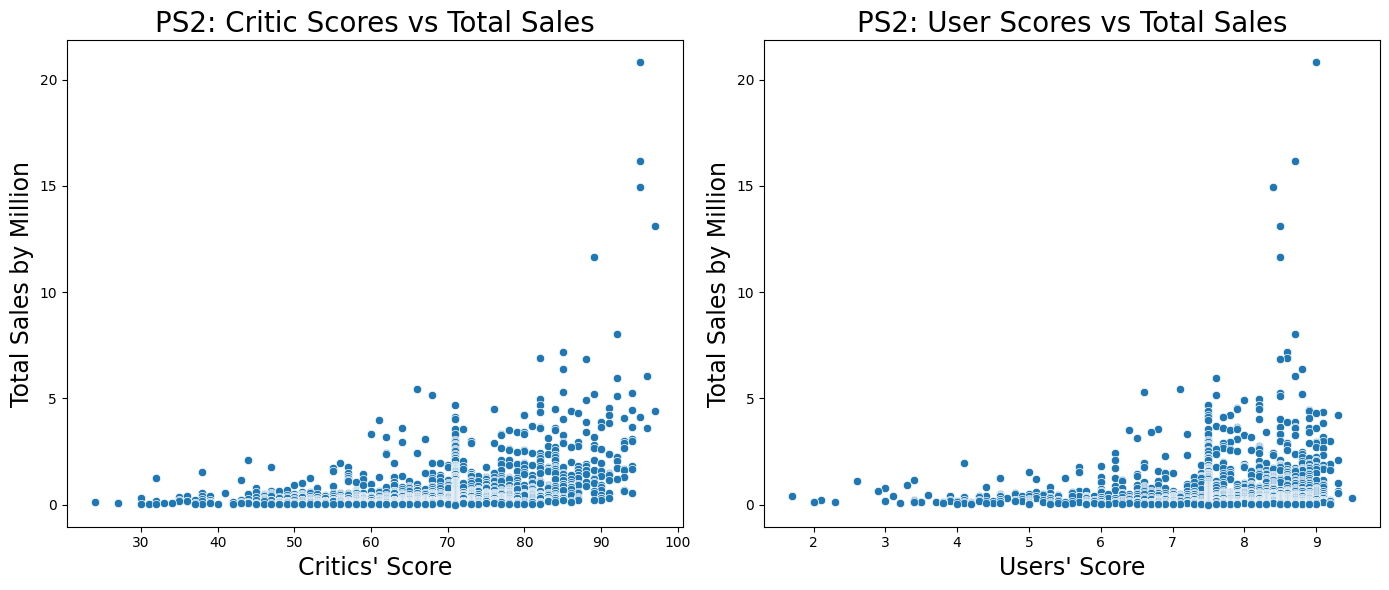

In [178]:
# Analyze relationship between reviews and sales on PS2 platform
# Filtering PS2 games
ps2_df = games_df[games_df['platform']  == 'PS2']

# Clean NaN values
ps2_df = ps2_df[
    ps2_df['critic_score'].notna() &
    ps2_df['user_score'].notna() &
    ps2_df['total_sales'].notna()
]

# Create scatter plot critic vs sales
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
sns.scatterplot(
    data=ps2_df,
    x='critic_score',
    y='total_sales'
)

plt.title('PS2: Critic Scores vs Total Sales', fontsize=20)
plt.xlabel("Critics' Score", fontsize=17)
plt.ylabel('Total Sales by Million', fontsize=17)

# Scatter plot users vs sales
plt.subplot(1,2,2)
sns.scatterplot(
    data=ps2_df,
    x='user_score',
    y='total_sales'
)

plt.title('PS2: User Scores vs Total Sales', fontsize=20)
plt.xlabel("Users' Score", fontsize=17)
plt.ylabel('Total Sales by Million', fontsize=17)

plt.tight_layout()
plt.show()

Calculate the correlation between reviews and sales

In [179]:
critic_corr = ps2_df['critic_score'].corr(ps2_df['total_sales'])
users_corr = ps2_df['user_score'].corr(ps2_df['total_sales'])

print(f'Correlation (critic_score vs total_sales): {critic_corr:.3f}')
print(f'Correlation (user_score vs total_sales): {users_corr:.3f}')

Correlation (critic_score vs total_sales): 0.345
Correlation (user_score vs total_sales): 0.175


We can suggest that the critic reviews have a weak correlation on PS2 games sales while the user reviews have a almost null correlation on the PS2 games sales.

This means that eventhough the reviews do not have a significant impact on sales, a critic review is more accepted than the users review, problably due to the expertise.

Sales Compare on other platforms

3.9 Taking into account your conlcusions compare the sales of the same games on other platforms.

In [180]:
# Analyze relationship between reviews and sales on WiiU_df platform
# Filtering WiiU_df games
WiiU_df = games_df[games_df['platform']  == 'WiiU']

# Clean NaN values
WiiU_df = WiiU_df[
    WiiU_df['critic_score'].notna() &
    WiiU_df['user_score'].notna() &
    WiiU_df['total_sales'].notna()
]

critic_corr = WiiU_df['critic_score'].corr(WiiU_df['total_sales'])
users_corr = WiiU_df['user_score'].corr(WiiU_df['total_sales'])

print(f'Correlation (critic_score vs total_sales): {critic_corr:.3f}')
print(f'Correlation (user_score vs total_sales): {users_corr:.3f}')

Correlation (critic_score vs total_sales): 0.308
Correlation (user_score vs total_sales): 0.317


In [181]:
# Analyze relationship between reviews and sales on PS2 platform
# Filtering PS2 games
ds_df = games_df[games_df['platform']  == 'DS']

# Clean NaN values
ds_df = ds_df[
    ds_df['critic_score'].notna() &
    ds_df['user_score'].notna() &
    ds_df['total_sales'].notna()
]

critic_corr = ds_df['critic_score'].corr(ds_df['total_sales'])
users_corr = ds_df['user_score'].corr(ds_df['total_sales'])

print(f'Correlation (critic_score vs total_sales): {critic_corr:.3f}')
print(f'Correlation (user_score vs total_sales): {users_corr:.3f}')

Correlation (critic_score vs total_sales): 0.123
Correlation (user_score vs total_sales): 0.052


For WiiU platform we can consider that the correlation is weak in both critic and users scores, but still having some impact in the same level for the platform.

On the other hand for the DS platform the correlation for both critics and users is weak with an almost null impact on sales.  

3.10 Take a look at the general distribution of games by genre.

- What can be said about the most profitable genres?
- Can you generalize about the genres with high and low sales?

General distribution by game genre

In [182]:
# Dataset for games genre
genre_counts = games_df['genre'].value_counts().reset_index()
genre_counts.columns = ['genre', 'num_games']

display(genre_counts)

,genre,num_games
0,Action,3369
1,Sports,2348
2,Misc,1750
3,Role-Playing,1498
4,Shooter,1323
5,Adventure,1303
6,Racing,1249
7,Platform,888
8,Simulation,873
9,Fighting,849


C:\Users\jovan\AppData\Local\Temp\ipykernel_43056\1371048948.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


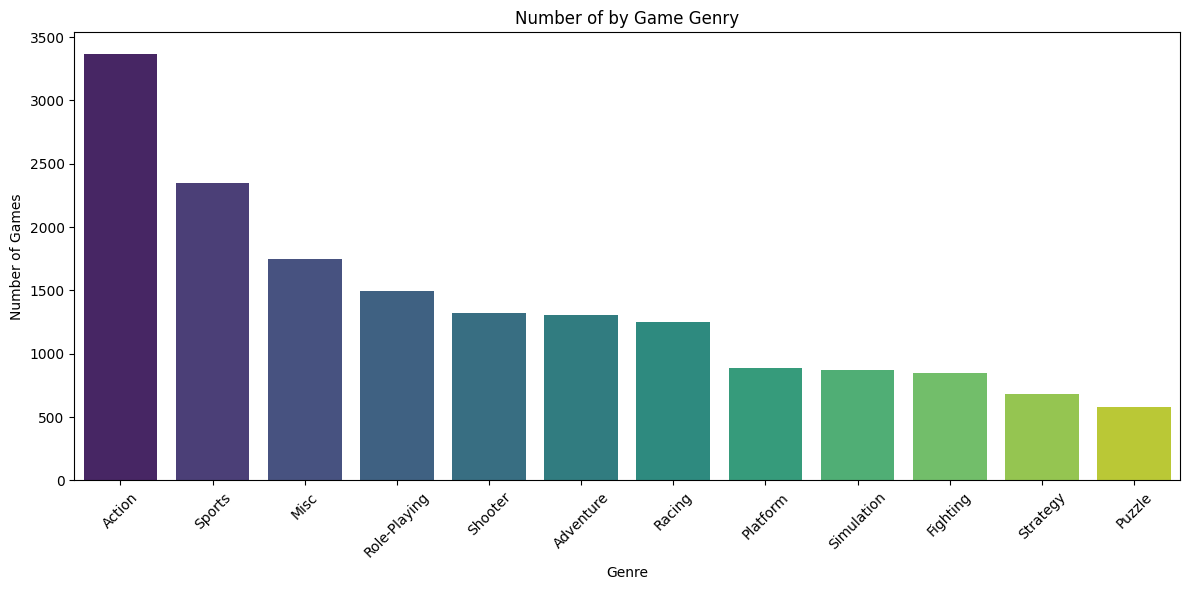

In [ ]:
# Create a graphic to visualize the game genre info

plt.figure(figsize=(12,6))

sns.barplot(
    data=genre_counts,
    x='genre',
    y='num_games',
    palette='viridis'
)

plt.title('Number of Games by Genry')
plt.xlabel('Genre')
plt.ylabel('Number of Games')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Which are the most profitable games?

,genre,total_sales
0,Action,1744.17
1,Sports,1331.27
2,Shooter,1052.45
3,Role-Playing,934.56
4,Platform,827.77
5,Misc,802.51
6,Racing,728.67
7,Fighting,447.53
8,Simulation,389.97
9,Puzzle,242.57


C:\Users\jovan\AppData\Local\Temp\ipykernel_43056\3661531419.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


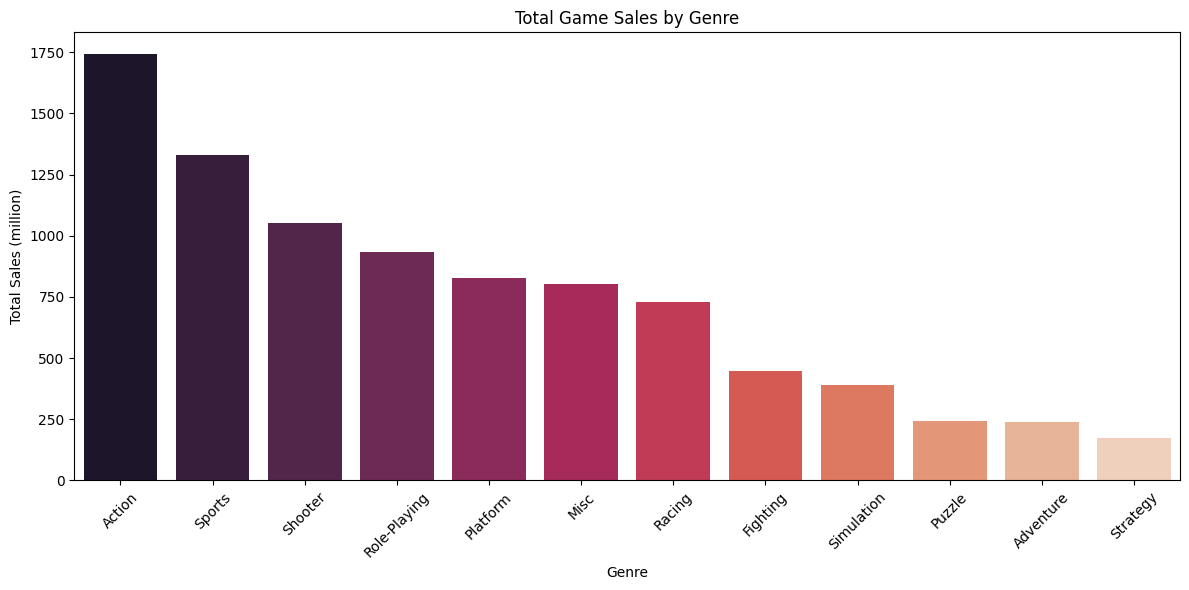

In [ ]:
# Shows which are the most profitable games
genre_sales = (
    games_df.groupby('genre')['total_sales']
    .sum()
    .sort_values(ascending=False)
    .reset_index()
)

print('Most Profitable Games')
display(genre_sales)
#display(genre_sales_two)

# Create graphic
plt.figure(figsize=(12,6))

sns.barplot(
    data=genre_sales,
    x='genre',
    y='total_sales',
    palette='rocket'
)

plt.title('Total Game Sales by Genre')
plt.xlabel('Genre')
plt.ylabel('Total Sales (million)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

,count,mean,median,sum
genre,,,,
Platform,888,0.932173,0.27,827.77
Shooter,1323,0.795503,0.24,1052.45
Role-Playing,1498,0.623872,0.18,934.56
Racing,1249,0.583403,0.19,728.67
Sports,2348,0.566980,0.22,1331.27
Fighting,849,0.527126,0.21,447.53
Action,3369,0.517711,0.19,1744.17
Misc,1750,0.458577,0.16,802.51
Simulation,873,0.446701,0.15,389.97


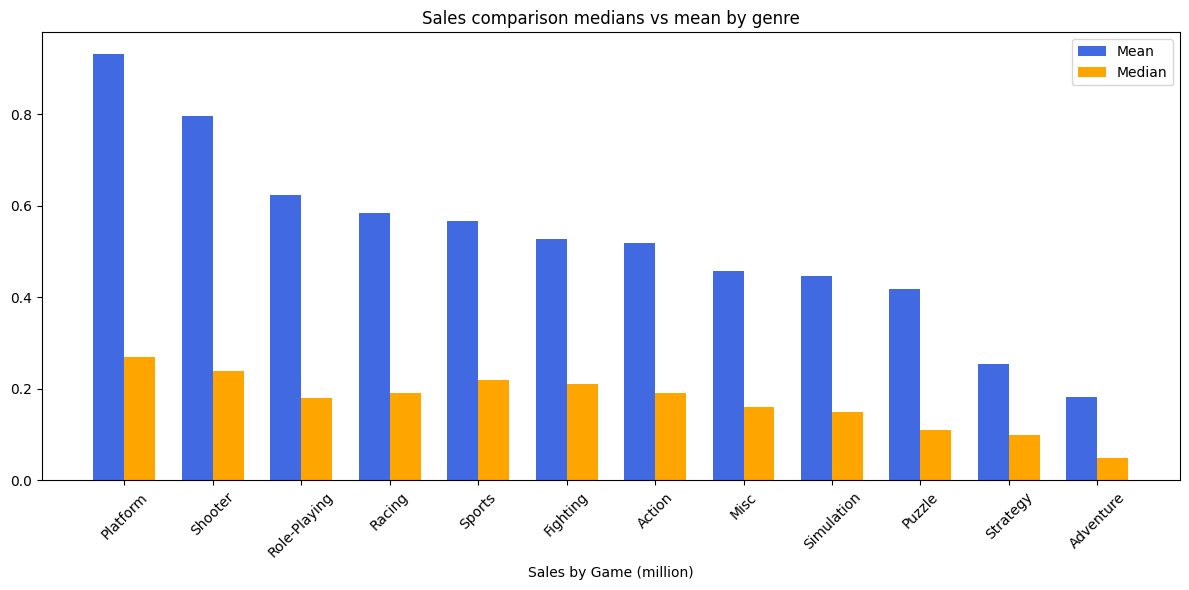

In [185]:
# Shows genre statistics
genre_stats = games_df.groupby('genre')['total_sales'].agg(['count', 'mean', 'median', 'sum']).sort_values(by='mean', ascending=False)

display(genre_stats)

# Shows median vs mean comparison by genre
genre_stats_graphic = (
    games_df.groupby('genre')['total_sales']
    .agg(['mean', 'median'])
    .sort_values(by='mean', ascending=False)
    .reset_index()
)

x = genre_stats_graphic['genre']
mean = genre_stats_graphic['mean']
median = genre_stats_graphic['median']

plt.figure(figsize=(12,6))

bar_width = 0.35
x_indexes = range(len(x))

plt.bar(x_indexes, mean, width=bar_width, label='Mean', color='royalblue')
plt.bar([i + bar_width for i in x_indexes], median, width=bar_width, label='Median', color='orange')

plt.xticks([i + bar_width / 2 for i in x_indexes], x, rotation=45)
plt.xlabel('Sales by Game (million)')
plt.title('Sales comparison medians vs mean by genre')
plt.legend()
plt.tight_layout()

plt.show()

We can consider that is not necesary to have a big amount of games to have grat sales, in this case even though the aciton genre is more popular and have the highest sales, the revenue of the genres Platform, Shooter and Role player are biger, so genralize about low or high sales is not effective if we want to focus on the revenue.

Step 4. Create a user profile by region (NA, EU, JP)
 
 - 5 major platforms with variations in their fees, 
 - The main 5 games 
 - Search about how ESRB clasification affect sales by individual regions

Top 5 platforms in North America:
 platform
X360    602.47
PS2     583.84
Wii     496.90
PS3     393.49
DS      382.40
Name: na_sales, dtype: float64

Top 5 platforms in European Union:
 platform
PS2     339.29
PS3     330.29
X360    270.76
Wii     262.21
PS      213.61
Name: eu_sales, dtype: float64

Top 5 platforms in Japan:
 platform
DS      175.57
PS      139.82
PS2     139.20
SNES    116.55
3DS     100.67
Name: jp_sales, dtype: float64


C:\Users\jovan\AppData\Local\Temp\ipykernel_43056\3305131345.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\jovan\AppData\Local\Temp\ipykernel_43056\3305131345.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\jovan\AppData\Local\Temp\ipykernel_43056\3305131345.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


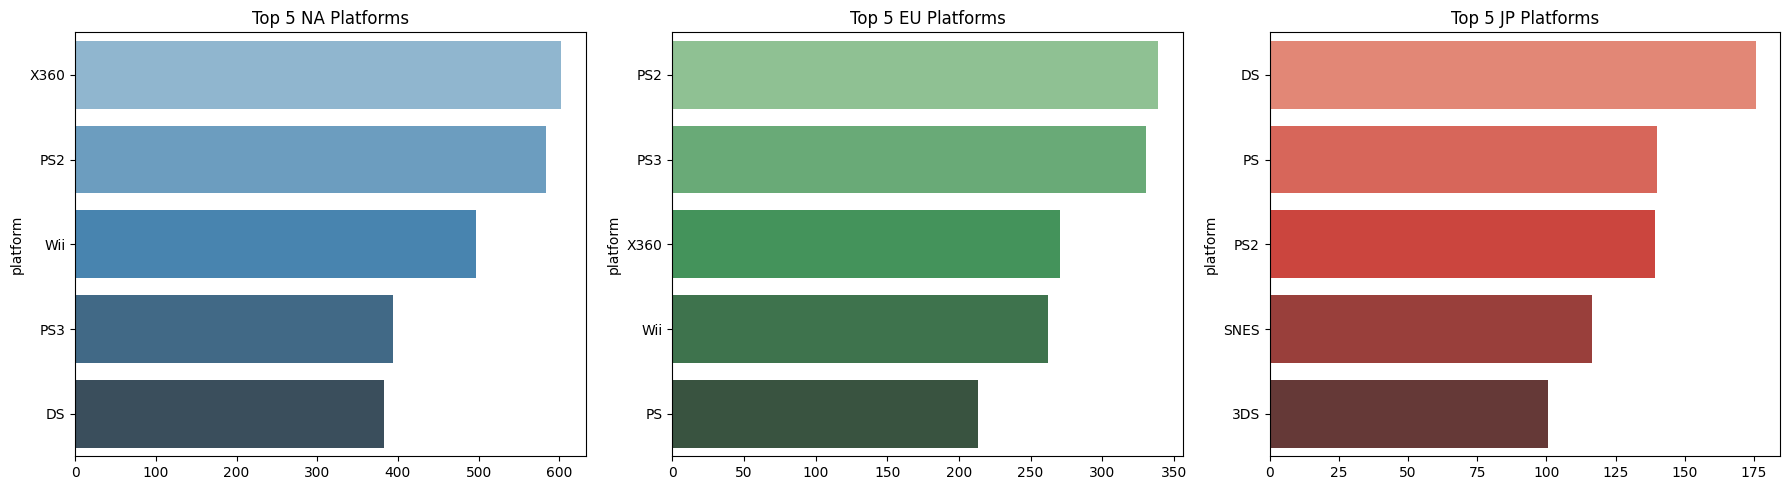

In [186]:
# Major 5 platforms
platform_by_region = (
    games_df.groupby('platform')[['na_sales', 'eu_sales', 'jp_sales']]
    .sum()
    .sort_values(by='na_sales', ascending=False)
)

top_na =platform_by_region['na_sales'].sort_values(ascending=False).head(5)
top_eu =platform_by_region['eu_sales'].sort_values(ascending=False).head(5)
top_jp =platform_by_region['jp_sales'].sort_values(ascending=False).head(5)

print('Top 5 platforms in North America:\n', top_na)
print('\nTop 5 platforms in European Union:\n', top_eu)
print('\nTop 5 platforms in Japan:\n', top_jp)

# Bar Graphic
fig, axs = plt.subplots(1,3, figsize=(18,5))

# NA graphic
sns.barplot(
    x=top_na.values,
    y=top_na.index,
    ax=axs[0],
    palette='Blues_d'
)

axs[0].set_title('Top 5 NA Platforms')
axs[0].set_label('Sales (million)')

# EU graphic
sns.barplot(
    x=top_eu.values,
    y=top_eu.index,
    ax=axs[1],
    palette='Greens_d'
)

axs[1].set_title('Top 5 EU Platforms')
axs[1].set_label('Sales (million)')

# JP graphic
sns.barplot(
    x=top_jp.values,
    y=top_jp.index,
    ax=axs[2],
    palette='Reds_d'
)

axs[2].set_title('Top 5 JP Platforms')
axs[2].set_label('Sales (million)')

plt.tight_layout()
plt.show()

,na_sales,eu_sales,jp_sales
platform,,,
X360,0.136852,0.111669,0.009581
PS2,0.132620,0.139932,0.107294
Wii,0.112872,0.108143,0.053439
PS3,0.089382,0.136221,0.061810
DS,0.086863,0.077903,0.135328


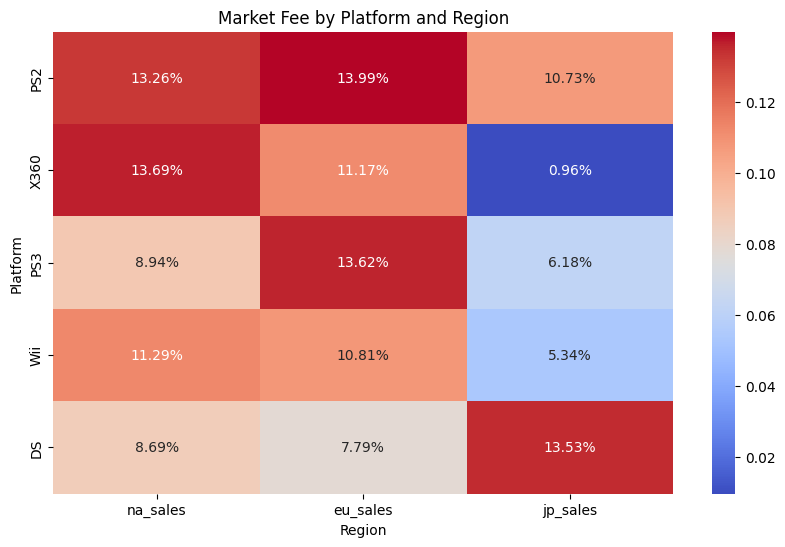

In [187]:
# Total sales per region
region_totals = games_df[['na_sales', 'eu_sales', 'jp_sales']].sum()

# Create dataset with region market shares
platform_shares = platform_by_region.copy()
platform_shares['na_sales'] = platform_shares['na_sales'] / region_totals['na_sales']
platform_shares['eu_sales'] = platform_shares['eu_sales'] / region_totals['eu_sales']
platform_shares['jp_sales'] = platform_shares['jp_sales'] / region_totals['jp_sales']

# Show top 5 platforms with market shares
platform_shares_sorted = platform_shares.sort_values(by='na_sales', ascending=False)
display(platform_shares_sorted.head(5)[['na_sales', 'eu_sales', 'jp_sales']])

# heatmap 
top_platforms = games_df.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(5).index
heat_data = platform_shares.loc[top_platforms, ['na_sales', 'eu_sales', 'jp_sales']]

plt.figure(figsize=(10,6))
sns.heatmap(
    heat_data,
    annot=True,
    fmt='.2%',
    cmap='coolwarm'
)

plt.title('Market Fee by Platform and Region')
plt.xlabel('Region')
plt.ylabel('Platform')
plt.show()

- X360 platform the sales are higher on North America and very low in Japan, 
- PS2 platform sales are quite near from each other on the 3 regions which means that the PS2 platform had a success sales in general, 
- WII was very popular in NA and EU but not in JP, for PS3 EU region had the highest sales followed by NA and then JP, 
- DS platform was very well accepted in JP region, followed by NA and then EU.

Top 5 genres in North America:
 genre
Action      879.01
Sports      684.43
Shooter     592.24
Platform    445.50
Misc        407.27
Name: na_sales, dtype: float64

Top 5 genres in European Union:
 genre
Action     519.13
Sports     376.79
Shooter    317.34
Racing     236.51
Misc       212.74
Name: eu_sales, dtype: float64

Top 5 genres in Japan:
 genre
Role-Playing    355.41
Action          161.43
Sports          135.54
Platform        130.83
Misc            108.11
Name: jp_sales, dtype: float64


C:\Users\jovan\AppData\Local\Temp\ipykernel_43056\373308800.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\jovan\AppData\Local\Temp\ipykernel_43056\373308800.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\jovan\AppData\Local\Temp\ipykernel_43056\373308800.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


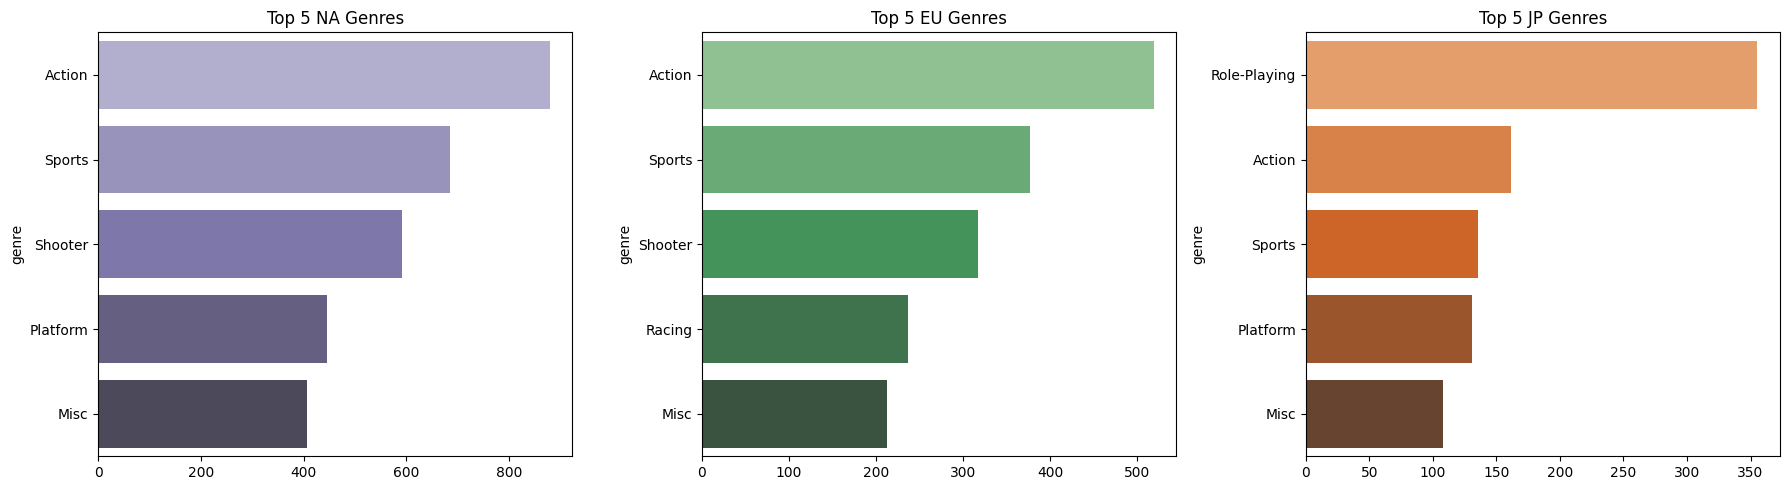

In [188]:
# Merge genres and add-up sales by region
genre_by_region = games_df.groupby('genre')[['na_sales', 'eu_sales', 'jp_sales']].sum()


# Top 5 per region
top_genres_na =genre_by_region['na_sales'].sort_values(ascending=False).head(5)
top_genres_eu =genre_by_region['eu_sales'].sort_values(ascending=False).head(5)
top_genres_jp =genre_by_region['jp_sales'].sort_values(ascending=False).head(5)

print('Top 5 genres in North America:\n', top_genres_na)
print('\nTop 5 genres in European Union:\n', top_genres_eu)
print('\nTop 5 genres in Japan:\n', top_genres_jp)

# Barplot
fig, axs = plt.subplots(1,3, figsize=(18,5))

# NA graphic
sns.barplot(
    x=top_genres_na.values,
    y=top_genres_na.index,
    ax=axs[0],
    palette='Purples_d'
)

axs[0].set_title('Top 5 NA Genres')
axs[0].set_label('Sales (million)')

# EU graphic
sns.barplot(
    x=top_genres_eu.values,
    y=top_genres_eu.index,
    ax=axs[1],
    palette='Greens_d'
)

axs[1].set_title('Top 5 EU Genres')
axs[1].set_label('Sales (million)')

# JP graphic
sns.barplot(
    x=top_genres_jp.values,
    y=top_genres_jp.index,
    ax=axs[2],
    palette='Oranges_d'
)

axs[2].set_title('Top 5 JP Genres')
axs[2].set_label('Sales (million)')

plt.tight_layout()
plt.show()


The diference among the 3 regions about the top genres is that genres: Action, Sports and Shooter are very popular in NA and EU regions, then followed by Platform/Racing genres and Misc, on the other hand in JP region the most popular genre is Role-playing, followed by Action, Sports, Platform and Misc. Probably culture is playing a important role in the preferences of the genres.

,na_sales,eu_sales,jp_sales
rating,,,
E,1292.99,710.25,198.11
Unknown,1242.46,613.83,841.96
T,759.75,427.03,151.40
M,748.48,483.97,64.24
E10+,353.32,188.52,40.20
K-A,2.56,0.27,1.46
EC,1.53,0.11,0.00
AO,1.26,0.61,0.00
RP,0.00,0.08,0.00


<Figure size 1200x600 with 0 Axes>

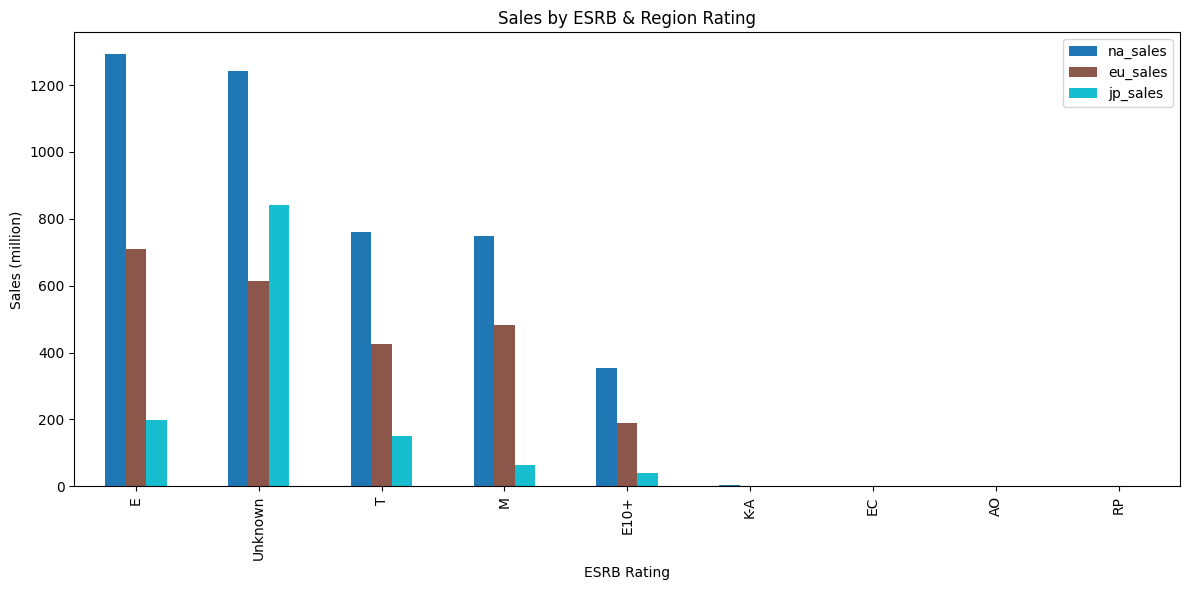

In [189]:
# ESRB rating by region
esrb_by_region = (
    games_df.groupby('rating')[['na_sales', 'eu_sales', 'jp_sales']]
    .sum()
    .sort_values(by='na_sales', ascending=False)
)

display(esrb_by_region)

plt.figure(figsize=(12,6))

esrb_by_region[['na_sales', 'eu_sales', 'jp_sales']].plot(
    kind='bar',
    stacked=False,
    figsize=(12,6),
    colormap='tab10'
)

plt.title('Sales by ESRB & Region Rating')
plt.xlabel('ESRB Rating')
plt.ylabel('Sales (million)')
plt.tight_layout()
plt.show()

The ESRB rating is affecting the region sales, we can see that the NA and EU region have more audience for the E rating than the other ratings, this may be due to video games culture for Everyone is popular in these regions, may be a big age range people that like to play in group than in JP, the other rates are for a specific audiences that divides the general audience and contiains smaller percentage of customers, so sales are not that higher than everyone.

Step 5. Hypothesis Test

5.1 The average users ratings are equal for Xbox One and PC

In [190]:
# filter and change to float values
xbox_scores = games_df[(games_df['platform'] == 'XOne') & (games_df['user_score'].notna())].copy()
pc_scores = games_df[(games_df['platform'] == 'PC') & (games_df['user_score'].notna())].copy()

# Convert strings to float
xbox_scores['user_score'] = pd.to_numeric(xbox_scores['user_score'], errors='coerce')
pc_scores['user_score'] = pd.to_numeric(pc_scores['user_score'], errors='coerce')

# Eliminate NaNs
xbox_scores = xbox_scores['user_score'].dropna()
pc_scores = pc_scores['user_score'].dropna()

t_stat, p_value = st.ttest_ind(xbox_scores, pc_scores, equal_var=False)

print(f'T-stat: {t_stat:.3f}, P-value: {p_value:.4f}')

# Alpha value
alpha = 0.05

if p_value < alpha:
    print('We reject the null hypothesis, there is a significant difference')
else:
    print('We cannot reject the null hypothesis, there is insufficent evidence of diference')

T-stat: -4.101, P-value: 0.0000
We reject the null hypothesis, there is a significant difference


5.2 The average users ratings are different for Action and Sports genres.
5.3 Set the alpha threshold value

In [191]:
# filter and change to float values
action_scores = games_df[(games_df['genre'] == 'Action') & (games_df['user_score'].notna())].copy()
sports_scores = games_df[(games_df['genre'] == 'Sports') & (games_df['user_score'].notna())].copy()

# Convert strings to float
action_scores['user_score'] = pd.to_numeric(action_scores['user_score'], errors='coerce')
sports_scores['user_score'] = pd.to_numeric(sports_scores['user_score'], errors='coerce')

# Eliminate NaNs
action_scores = action_scores['user_score'].dropna()
sports_scores = sports_scores['user_score'].dropna()

t_stat, p_value = st.ttest_ind(action_scores, sports_scores, equal_var=False)

print(f'T-stat: {t_stat:.3f}, P-value: {p_value:.4f}')

# Alpha value
alpha = 0.05

if p_value < alpha:
    print('We reject the null hypothesis, there is a significant difference')
else:
    print('We cannot reject the null hypothesis, there is insufficient evidence of diference')

T-stat: 0.364, P-value: 0.7159
We cannot reject the null hypothesis, there is insufficient evidence of diference


5.4 explain how the null and alternative hypothesis were formulated
what criteria did you use for proof the hypothesis and why

the 1st hypothesis, the H0 is based on the average scores are equals for Xbox One and PC platforms and for the H1 the average scores are different

I used a hypothesis test to compare 2 independant medias, so if p value is less than alpha we have a significant difference, otherwise if p is equal or greater than alpha then there is insufficient difference.

for the 2nd hypothesis, the H0 is based on the average scores for genre Action and Sports are equals and for the H1 the average genre scores are different

Alpha was set to 0.05

the test value means that there is asignificant statistic difference between the score average from Xone and PC users, problably the quality or the user experience are different for the user expect. 

for the genre on action and sports we can see that there is not significant difference in the preference from the users.

Conlusion

We get to the conclusion that to have a wide vision about video games sales, we need to consider that a succsesful game not always gener a big revenue, it dependes on the region, platform and genre of games that the company becomes profitalbe.

We need to consider what are the most popular genre and platform to decide what games need to be produced for the next season, so the decision can lead the company to a great revenue